```
Predicting Health Outcomes of Horses with Machine Learning
Context
 Our objective is to leverage advanced analytics to predict health outcomes in horses, enabling veterinarians to make more informed decisions that can improve treatment strategies and overall horse health management. Utilizing machine learning techniques, particularly classification algorithms, you will analyze clinical data from horses to predict various health outcomes.

Dataset Description
You have been provided with a comprehensive dataset containing clinical records of horses treated in a veterinary hospital. The data encapsulates a variety of clinical attributes that offer insights into the general health and medical condition of each horse. Each record in the dataset is described by the following features:

Clinical Attributes:
id: Unique identifier for each horse.
surgery: Whether the horse had surgery (Yes/No).
age: Age of the horse.
hospital_number: Unique number assigned to the horse at the hospital.
rectal_temp: Rectal temperature of the horse.
pulse: Pulse rate in beats per minute.
respiratory_rate: Respiratory rate in breaths per minute.
temp_of_extremities: Temperature of extremities (a possible indicator of shock).
peripheral_pulse: Quality of the peripheral pulse.
mucous_membrane: Color of the mucous membranes, which can indicate blood circulation quality.
capillary_refill_time: Time taken for color to return to mucous membrane after pressure is applied.
pain: Horse's pain level (graded).
peristalsis: Intestinal activity observed.
abdominal_distention: Any distention of the abdomen.
nasogastric_tube: Whether a nasogastric tube has been placed.
nasogastric_reflux: Any nasogastric reflux noted.
nasogastric_reflux_ph: pH of the nasogastric reflux.
rectal_exam_feces: Findings of the rectal examination of feces.
abdomen: Detailed examination findings of the abdomen.
packed_cell_volume: Packed cell volume, indicating hydration status and blood loss.
total_protein: Total protein levels in blood.
abdomo_appearance: Appearance of abdominal fluid.
abdomo_protein: Protein level in abdominal fluid.
surgical_lesion: Presence of surgical lesions.
lesion_1, lesion_2, lesion_3: Type and location of lesions identified.
cp_data: Clinical pathology data.
outcome: Health outcome of the horse (e.g., recovered, euthanized, died).
Your task is to use machine learning models to predict the 'outcome' for each horse and identify key predictors of health outcomes. This project will contribute significantly to improving the predictive models used in veterinary practices.

```

In [1]:
!wget -nc -P ../data/ "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/101/original/health_outcome_dataset.csv"

--2024-12-16 16:51:26--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/101/original/health_outcome_dataset.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.158.41.203, 108.158.41.226, 108.158.41.214, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.158.41.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229201 (224K) [text/plain]
Saving to: ‘../data/health_outcome_dataset.csv’

health_outcome_data 100%[===================>] 223.83K  --.-KB/s    in 0.009s  

2024-12-16 16:51:26 (24.1 MB/s) - ‘../data/health_outcome_dataset.csv’ saved [229201/229201]



In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [11]:
df= pd.read_csv('../data/health_outcome_dataset.csv')
df.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [12]:
df.isna().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [13]:
df.drop(['lesion_3'], inplace= True, axis= 1)

# Create imputer objects
num_imputer= SimpleImputer(strategy= 'median') # for numerical columns
cat_imputer= SimpleImputer(strategy= 'most_frequent') # for categorical columns

# Define columns by type
num_cols = ['rectal_temp', 'pulse', 'respiratory_rate']  # Numerical columns
cat_cols = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time',
            'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube',
            'nasogastric_reflux', 'abdomen', 'abdomo_appearance', 'rectal_exam_feces']  # Categorical columns


df[num_cols]= num_imputer.fit_transform(df[num_cols])
df[cat_cols]= cat_imputer.fit_transform(df[cat_cols])
            

In [14]:
df.isna().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
cp_data                  0
outcome                  0
dtype: int64

In [15]:
df['outcome'].value_counts()

outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64

```
Pulse Rate Distribution
Context:
Analyzing the pulse rate distribution among horses with different health outcomes can provide critical insights into physiological states associated with various health conditions. This analysis can help veterinarians understand how pulse rate might correlate with the severity or type of condition a horse is facing.

Task:
Create a visual representation to analyze the pulse rate distribution across different health outcomes using the 'pulse' and 'outcome' columns in the dataset.

Instructions:
Group and Count Data: Use the dataset to group entries by 'outcome' and calculate the average 'pulse' for each outcome category.
Visualize Data: Generate a box plot to display the distribution of pulse rates for each health outcome category. This will help in visually comparing the pulse rate variability associated with different outcomes.
Analyze Trends: Examine the box plot to determine which health outcome is associated with the highest average pulse rate and which shows the most variability in pulse rates.
Question:
After analyzing the box plot representing the pulse rate distribution for different health outcomes, identify the correct statements regarding pulse rates.

Options:
A) The average pulse rate is highest among horses that lived, indicating recovery from potentially distressing conditions.

B) The average pulse rate is lowest for horses that were euthanized, suggesting less physiological distress before euthanasia.

C) The average pulse rate is highest among horses that died, suggesting a correlation between high pulse rates and critical health conditions leading to death.

D) The box plot shows no significant difference in the average pulse rates across different health outcomes.
```

outcome
died          90.207317
euthanized    86.573705
lived         68.918118
Name: pulse, dtype: float64


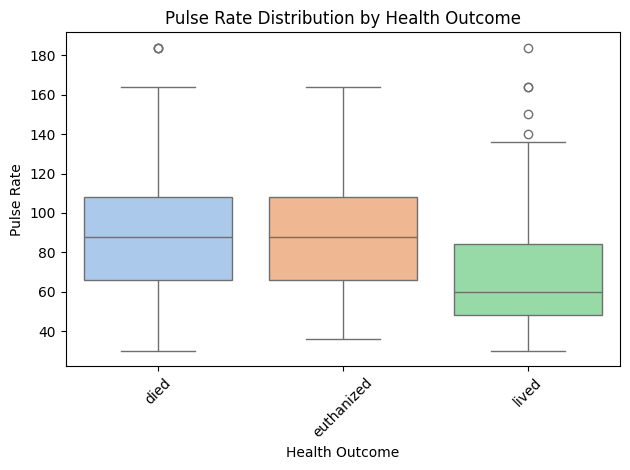

In [19]:
pulse_outcome_data= df.groupby('outcome')['pulse'].mean()

print(pulse_outcome_data)

custom_palette = sns.color_palette("pastel")
sns.boxplot(x= 'outcome', y= 'pulse', data=df, palette= custom_palette)
plt.title('Pulse Rate Distribution by Health Outcome')
plt.xlabel('Health Outcome')
plt.ylabel('Pulse Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels